In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import logging
import os


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel(logging.ERROR)

In [41]:
def create_datasets():
    return tf.keras.preprocessing.image_dataset_from_directory(
        "datasets",
        labels="inferred",
        batch_size=100,
        image_size=(150, 150),
        shuffle=True,
        seed=37,
        validation_split=0.1,
        subset="both"
    )

training_ds, validation_ds = create_datasets()
print(training_ds.class_names)
training_ds = training_ds.ignore_errors(log_warning=False).take(100)
validation_ds = validation_ds.ignore_errors(log_warning=False)


Found 24933 files belonging to 2 classes.
Using 22440 files for training.
Using 2493 files for validation.
['Cat', 'Dog']


In [3]:
def data_augmenter():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ])

def create_model():
    input_shape = (150, 150, 3)
    pretrained_model = tf.keras.applications.InceptionV3(
        include_top=False,
        input_shape= input_shape
    )
    pretrained_model.trainable = False
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmenter()(inputs)
    x = tf.keras.applications.inception_v3.preprocess_input(inputs)
    x = pretrained_model(x, training=False)
    x = layers.GlobalAvgPool2D()(x)
    x = layers.Dropout(rate=0.2)(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    return tf.keras.Model(inputs, output)

model = create_model()

In [4]:
# model.summary()

In [5]:
base_learning_rate = 0.001
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

initial_epochs = 6
history = model.fit(
    training_ds,
    validation_data=validation_ds,
    epochs=initial_epochs
)

Epoch 1/6
     28/Unknown 5s 79ms/step - accuracy: 0.7405 - loss: 0.6511

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


     32/Unknown 5s 79ms/step - accuracy: 0.7544 - loss: 0.6149

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


     40/Unknown 6s 79ms/step - accuracy: 0.7768 - loss: 0.5574

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


     51/Unknown 6s 79ms/step - accuracy: 0.7995 - loss: 0.4994

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


     57/Unknown 7s 79ms/step - accuracy: 0.8092 - loss: 0.4749

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


     65/Unknown 8s 79ms/step - accuracy: 0.8199 - loss: 0.4477

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


    100/Unknown 10s 79ms/step - accuracy: 0.8510 - loss: 0.3704

/opt/anaconda3/envs/deep/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.9171 - loss: 0.2080 - val_accuracy: 0.9655 - val_loss: 0.1005
Epoch 2/6
 10/100 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9617 - loss: 0.0958

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 13/100 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9622 - loss: 0.0968

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 39/100 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9637 - loss: 0.0973

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 42/100 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9636 - loss: 0.0978

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 59/100 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9630 - loss: 0.0996

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 66/100 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9627 - loss: 0.1002

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9624 - loss: 0.1018

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.9624 - loss: 0.1019 - val_accuracy: 0.9671 - val_loss: 0.0912
Epoch 3/6
 10/100 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9666 - loss: 0.0613

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 14/100 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9666 - loss: 0.0674

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 46/100 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9651 - loss: 0.0830

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9648 - loss: 0.0840

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 58/100 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9643 - loss: 0.0858

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 71/100 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9641 - loss: 0.0872

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9640 - loss: 0.0892

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.9647 - loss: 0.0930 - val_accuracy: 0.9687 - val_loss: 0.0934
Epoch 4/6
 13/100 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9711 - loss: 0.0722

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 46/100 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9705 - loss: 0.0758

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 52/100 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9704 - loss: 0.0765

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 62/100 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9703 - loss: 0.0775

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 78/100 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9704 - loss: 0.0783

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9703 - loss: 0.0790

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9692 - loss: 0.0819 - val_accuracy: 0.9663 - val_loss: 0.0987
Epoch 5/6
 21/100 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9645 - loss: 0.0888

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 27/100 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9655 - loss: 0.0865

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 47/100 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9677 - loss: 0.0821

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 54/100 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9682 - loss: 0.0810

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 70/100 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9689 - loss: 0.0792

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9697 - loss: 0.0775

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9712 - loss: 0.0730 - val_accuracy: 0.9695 - val_loss: 0.0864
Epoch 6/6
  6/100 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9590 - loss: 0.1077

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 12/100 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9639 - loss: 0.0946

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 43/100 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9687 - loss: 0.0766

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 69/100 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9705 - loss: 0.0727

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9714 - loss: 0.0716

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9731 - loss: 0.0701 - val_accuracy: 0.9727 - val_loss: 0.0831


In [6]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [7]:
import matplotlib.pyplot as plt


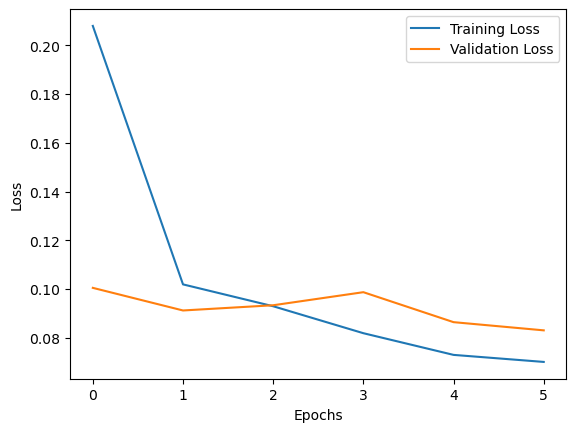

In [12]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [18]:
from PIL import Image
import numpy as np

In [74]:
def get_image_tensor(img_path):
    img = Image.open(img_path)

    if img.mode != 'RGB':
        img = img.convert('RGB')

    img = img.resize((150, 150))
    img_array = np.array(img, dtype=np.float32)
    return img_array

In [94]:
def predict(filename):
    model_path = "model_parameters/inception_v3_cats_dogs_classifier.keras"
    if not os.path.exists(model_path):
        print(f"No model found")
        return
    model = tf.keras.models.load_model(model_path)
    inputs = get_image_tensor(filename)
    prediction = model.predict(np.expand_dims(inputs, axis=0))
    print(prediction)
    prediction = prediction.flatten()[0]
    print(type(prediction))
    
    print(f"'{filename}' is detected as a {'CAT' if prediction < 0.5 else 'DOG'} " 
            f"with {prediction:.4f} ")

In [96]:
predict("images/cat-manul.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.05488992]]
<class 'numpy.float32'>
'images/cat-manul.jpg' is detected as a CAT with 0.0549 


In [69]:
def images_to_tensor(image_paths):
    img_arrays = [get_image_tensor(path) for path in image_paths]
    batch_array = np.stack(img_arrays, axis=0)
    return tf.convert_to_tensor(batch_array, dtype=tf.float32)

In [86]:
image_paths = []
for i in range(10):
    file_path = f"datasets/Dog/{i}.jpg"
    if os.path.exists(file_path):
        image_paths.append(file_path)


In [87]:
model_path = "model_parameters/inception_v3_cats_dogs_classifier.keras"
if not os.path.exists(model_path):
    print(f"No model found")
model = tf.keras.models.load_model(model_path)

In [104]:
def predict_batch(image_paths):
    model_path = "model_parameters/inception_v3_cats_dogs_classifier.keras"
    if not os.path.exists(model_path):
        print(f"No model found")
        return
    model = tf.keras.models.load_model(model_path)
    inputs = images_to_tensor(image_paths)
    prediction = model.predict(inputs)
    prediction = prediction.flatten()
    for i, img_path in enumerate(image_paths):
        print(f"'{img_path}' is detected as a {'CAT' if prediction[i] < 0.5 else 'DOG'} " 
            f"with y = {prediction[i]:.4f}")

In [105]:
predict_batch(image_paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(10, 1)
[0.99997854 0.9999019  0.9182963  0.9922742  0.9997588  0.9951304
 0.99952865 0.999619   0.99969685 0.99901056]
'datasets/Dog/0.jpg' is detected as a DOG with y = 1.0000
'datasets/Dog/1.jpg' is detected as a DOG with y = 0.9999
'datasets/Dog/2.jpg' is detected as a DOG with y = 0.9183
'datasets/Dog/3.jpg' is detected as a DOG with y = 0.9923
'datasets/Dog/4.jpg' is detected as a DOG with y = 0.9998
'datasets/Dog/5.jpg' is detected as a DOG with y = 0.9951
'datasets/Dog/6.jpg' is detected as a DOG with y = 0.9995
'datasets/Dog/7.jpg' is detected as a DOG with y = 0.9996
'datasets/Dog/8.jpg' is detected as a DOG with y = 0.9997
'datasets/Dog/9.jpg' is detected as a DOG with y = 0.9990
